In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

kinz_df= pd.read_csv("/content/drive/MyDrive/Iqram Sir/AI_Frailty-MATLAB_Sample/KINZ_JOINT.csv")

clinic_df = pd.read_csv("/content/drive/MyDrive/Iqram Sir/AI_Frailty-MATLAB_Sample/ClinicalData80.csv")


In [3]:
clinic_df

,RecordID,Age,Sex,Ethnicity,Race,ZipCode,SmokingStatus,PackyearSmokingHistory,AlcoholUse,FrequencyInPastWeekOfDrinks,...,Complication3Description,Complication4Type,Complication4ClavienDindoAssessmentGrade,Complication4Description,Complication5Type,Complication5ClavienDindoAssessmentGrade,Complication5Description,ComprehensiveComplicationIndexScore,AdditionalNotes,Complete6
0,001-LO,43,Female,Not Hispanic or Latino,White,NaN,No,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
1,002-RJ,77,Female,Not Hispanic or Latino,Black or African American,NaN,No,NaN,No,NaN,...,Numbness in fingers,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,Complete
2,003-RM,48,Male,Hispanic or Latino,White,NaN,Past,3,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,NaN,Complete
3,004-MF,54,Female,Hispanic or Latino,White,NaN,Past,1,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
4,005-GP,46,Male,Hispanic or Latino,White,NaN,No,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,076-AH,60,Male,Not Hispanic or Latino,Black or African American,11236.0,Past,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
75,077-SK,79,Male,Not Hispanic or Latino,White,12572.0,Past,25.00,Yes,3.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
76,078-SM,81,Male,Not Hispanic or Latino,White,11516.0,Past,30.00,Yes,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
77,079-KO,78,Female,Not Hispanic or Latino,White,11372.0,No,NaN,Yes,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete


In [4]:
#TotalFFIScore

In [5]:
import numpy as np
from tqdm import tqdm


kinz_np = kinz_df.values # converting to np array

new_kinz = []
not_found_sub = []




for i in tqdm(kinz_np):

  # some RecordId name formate is not matching with the main data file....So we have to re formate the name
  sep = i[0].split("-")
  if sep[0].isdigit():
    sub = i[0]
  else:
    sub  = sep[-1]+"-"+sep[0]

  #quearing the TotalFFIScore
  total_ffi_score = clinic_df[clinic_df["RecordID"]==sub]["TotalFFIScore"]

  # Check if total_ffi_score is not empty
  if not total_ffi_score.empty:
    new_row = np.append(i, total_ffi_score.iloc[0])
  else:
    not_found_sub.append(i[0])
    new_row = np.append(i, 'nan')  # Append 'nan' for missing values
    #print("Loop broke!!!")

  new_kinz.append(new_row)




kinz_np = np.array(new_kinz)

100%|██████████| 82942/82942 [00:39<00:00, 2096.66it/s]


In [6]:
len(kinz_np[0])

101

In [7]:
set(not_found_sub)

{'021-GA', '080-TW'}

In [8]:
df = pd.DataFrame(kinz_np, columns=kinz_df.columns.to_list()+["frailty_class"])

replace_values = {0.0:0 ,1.0: 1, 2.0: 1, 3.0: 1, 4.0: 1}

df['frailty_class'] = df['frailty_class'].replace(replace_values)

In [9]:
df

,patientID,trial_num,walking_speed,timeStamps,PELVIS_X,SPINE_NAVAL_X,SPINE_CHEST_X,NECK_X,CLAVICLE_LEFT_X,SHOULDER_LEFT_X,...,KNEE_RIGHT_Z,ANKLE_RIGHT_Z,FOOT_RIGHT_Z,HEAD_Z,NOSE_Z,EYE_LEFT_Z,EAR_LEFT_Z,EYE_RIGHT_Z,EAR_RIGHT_Z,frailty_class
0,001-LO,Trial1,Regular,0.014806,513.079538,516.003537,527.994788,545.712851,516.26463,405.175317,...,929.656427,825.884006,894.117256,925.016797,954.213183,938.401915,886.661529,968.354628,981.439603,1
1,001-LO,Trial1,Regular,0.034787,518.341956,523.496677,539.288301,549.834306,520.12818,405.456134,...,924.690502,784.109292,847.342565,961.51453,951.963861,963.009239,945.312977,991.238931,1044.996519,1
2,001-LO,Trial1,Regular,0.054767,529.923963,541.248914,552.630499,552.997228,524.350174,408.479201,...,936.771136,777.246423,837.827719,987.26201,983.921111,995.232664,973.751899,1023.415136,1073.302525,1
3,001-LO,Trial1,Regular,0.074748,534.861455,548.038017,556.688923,551.944125,523.861126,407.510892,...,967.04412,802.468369,862.476378,1015.462905,1023.426646,1033.121369,1005.673693,1059.598333,1098.709654,1
4,001-LO,Trial1,Regular,0.094728,534.057534,545.354058,552.725394,547.248025,519.301345,403.0937,...,1013.036813,855.41427,916.645154,1045.783754,1069.454529,1075.905348,1040.604981,1099.243905,1121.611912,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82937,080-TW,Trial4,Fast,6.710077,-75.513272,-91.116753,-103.032557,-113.85734,-81.43161,41.293722,...,877.753813,1076.994394,1096.88562,691.167469,727.103133,724.091722,665.765855,760.482948,787.098138,nan
82938,080-TW,Trial4,Fast,6.730058,-73.899128,-91.786137,-105.789961,-118.876502,-87.122933,31.064432,...,890.880772,1081.828347,1077.171735,693.164032,723.1432,718.966678,663.865764,755.543358,785.451411,nan
82939,080-TW,Trial4,Fast,6.750038,-72.284984,-92.45552,-108.547366,-123.895664,-92.814256,20.835141,...,904.007731,1086.6623,1057.45785,695.160595,719.183266,713.841633,661.965672,750.603769,783.804684,nan
82940,080-TW,Trial4,Fast,6.770019,-70.795676,-93.06699,-111.07436,-128.380647,-97.93904,11.455856,...,916.337316,1091.584475,1040.287678,696.491535,715.211697,708.845724,659.888708,745.726696,781.801935,nan




---



---



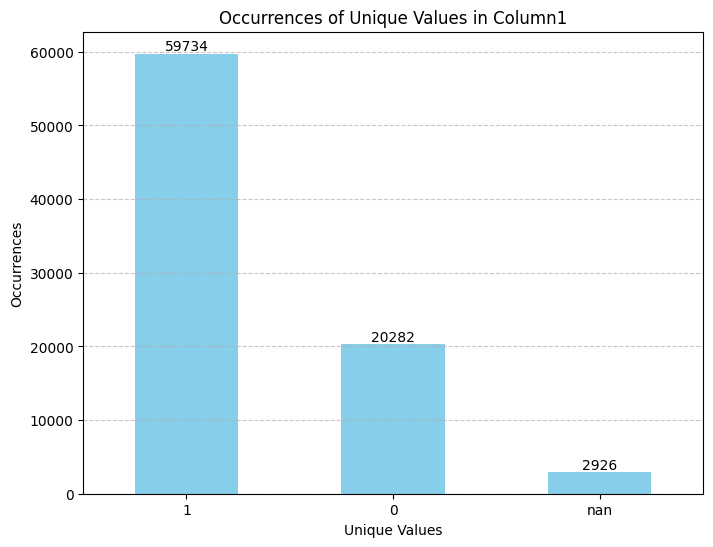

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

value_counts = df['frailty_class'].value_counts()

# Plot the occurrences of unique values
plt.figure(figsize=(8, 6))
ax = value_counts.plot(kind='bar', color='skyblue')

# Add annotations on top of the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set labels and title
plt.xlabel('Unique Values')
plt.ylabel('Occurrences')
plt.title('Occurrences of Unique Values in Column1')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [11]:

majority_class = df[df["frailty_class"] == 1].reset_index(drop = True)
minority_class = df[df["frailty_class"] == 0].reset_index(drop = True)




In [13]:
set(majority_class["patientID"])

{'001-LO',
 '002-RJ',
 '004-MF',
 '005-GP',
 '008-BJ',
 '013-MS',
 '014-WF',
 '019-ER',
 '023-PH',
 '024-PO',
 '025-PS',
 '027-GO',
 '028-DF',
 '029-JC',
 '030-RE',
 '034-MJ',
 '035-LT',
 '037-MA',
 '038-LB',
 '039-EB',
 '040-KR',
 '044-MS',
 '046-MI',
 '049-RL',
 '050-TE',
 '051-BV',
 '052-EF',
 '054-LC',
 '055-HK',
 '057-JH',
 '058-ZS',
 '060-CC',
 '061-JM',
 '063-JS',
 '064-SC',
 '065-JH',
 '067-MT',
 '068-GM',
 '069-CR',
 '070-TC',
 '072-DD',
 '073-TP',
 '074-RK',
 '075-RW',
 '076-AH',
 '079-KO',
 'RM-003'}

In [14]:
set(minority_class["patientID"])

{'006-TR',
 '007-LI',
 '009-TB',
 '010-RA',
 '011-CB',
 '012-JM',
 '015-IL',
 '016-GE',
 '017-CS',
 '018-OS',
 '020-MM',
 '022-ND',
 '032-GB',
 '033-JF',
 '041-JL',
 '042-PB',
 '047-MW',
 '048-TT',
 '056-HT',
 '059-ES',
 '071-EK'}

In [25]:
filtered_majority_class_train = majority_class[majority_class["patientID"].isin(['001-LO',
 '002-RJ',
 '004-MF',
 '005-GP',
 '008-BJ',
 '013-MS',
 '014-WF',
 '019-ER',
 '023-PH',
 '024-PO',
 '025-PS',
 '027-GO',
 '028-DF',
 '029-JC',
'030-RE',
 '034-MJ',
 '035-LT',
 '037-MA',
 '038-LB',
 '039-EB'])]



filtered_majority_class_test = majority_class[majority_class["patientID"].isin([
  '030-RE',
 '034-MJ',
 '035-LT',
 '037-MA',
 '038-LB',
 '039-EB',
 '040-KR',])]


filtered_majority_class_train.shape, filtered_majority_class_test.shape

((23191, 101), (7690, 101))

In [26]:

filtered_minority_class_train = minority_class[minority_class["patientID"].isin([
 '006-TR',
 '007-LI',
 '009-TB',
 '010-RA',
 '011-CB',
 '012-JM',
 '015-IL',
 '016-GE',
 '017-CS',
 '018-OS',
 '020-MM',
 '022-ND',
 '032-GB',
 '033-JF',
 '041-JL',
 '042-PB',
 '047-MW',
 '048-TT',
 '056-HT',
 '059-ES',
 '071-EK'])]



filtered_minority_class_test = minority_class[minority_class["patientID"].isin([
 '041-JL',
 '042-PB',
 '047-MW',
 '048-TT',
 '056-HT',
 '059-ES',
 '071-EK'])]



filtered_minority_class_train.shape, filtered_minority_class_test.shape

((20282, 101), (7076, 101))

In [27]:
df_final_train = pd.concat([filtered_majority_class_train, filtered_minority_class_train], ignore_index=True)

df_final_test = pd.concat([filtered_majority_class_test, filtered_minority_class_test], ignore_index=True)

In [28]:
df_final_train.to_csv('/content/drive/MyDrive/Iqram Sir/AI_Frailty-MATLAB_Sample/Final_data_Balanced.csv', index=False)

df_final_test.to_csv('/content/drive/MyDrive/Iqram Sir/AI_Frailty-MATLAB_Sample/Final_data_valid.csv', index=False)

In [29]:
df_final_train

,patientID,trial_num,walking_speed,timeStamps,PELVIS_X,SPINE_NAVAL_X,SPINE_CHEST_X,NECK_X,CLAVICLE_LEFT_X,SHOULDER_LEFT_X,...,KNEE_RIGHT_Z,ANKLE_RIGHT_Z,FOOT_RIGHT_Z,HEAD_Z,NOSE_Z,EYE_LEFT_Z,EAR_LEFT_Z,EYE_RIGHT_Z,EAR_RIGHT_Z,frailty_class
0,001-LO,Trial1,Regular,0.014806,513.079538,516.003537,527.994788,545.712851,516.26463,405.175317,...,929.656427,825.884006,894.117256,925.016797,954.213183,938.401915,886.661529,968.354628,981.439603,1
1,001-LO,Trial1,Regular,0.034787,518.341956,523.496677,539.288301,549.834306,520.12818,405.456134,...,924.690502,784.109292,847.342565,961.51453,951.963861,963.009239,945.312977,991.238931,1044.996519,1
2,001-LO,Trial1,Regular,0.054767,529.923963,541.248914,552.630499,552.997228,524.350174,408.479201,...,936.771136,777.246423,837.827719,987.26201,983.921111,995.232664,973.751899,1023.415136,1073.302525,1
3,001-LO,Trial1,Regular,0.074748,534.861455,548.038017,556.688923,551.944125,523.861126,407.510892,...,967.04412,802.468369,862.476378,1015.462905,1023.426646,1033.121369,1005.673693,1059.598333,1098.709654,1
4,001-LO,Trial1,Regular,0.094728,534.057534,545.354058,552.725394,547.248025,519.301345,403.0937,...,1013.036813,855.41427,916.645154,1045.783754,1069.454529,1075.905348,1040.604981,1099.243905,1121.611912,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43468,071-EK,Trial4,Fast,5.223442,139.765899,131.899616,124.789803,129.19896,159.941471,284.639251,...,950.235146,1125.552457,1069.957645,661.130624,682.153747,690.918415,650.41819,722.157079,759.024619,0
43469,071-EK,Trial4,Fast,5.243423,141.382626,132.692612,125.146661,127.533644,158.607992,283.347906,...,933.171147,1088.115939,1019.434259,654.994076,679.151059,686.343676,642.756755,718.257095,753.004001,0
43470,071-EK,Trial4,Fast,5.263403,142.999353,133.485609,125.503519,125.868327,157.274514,282.056561,...,916.107147,1050.679421,968.910873,648.857528,676.14837,681.768936,635.095321,714.357112,746.983384,0
43471,071-EK,Trial4,Fast,5.283384,144.61608,134.278605,125.860377,124.203011,155.941036,280.765215,...,899.043147,1013.242903,918.387487,642.720979,673.145682,677.194197,627.433886,710.457128,740.962766,0


In [30]:
df_shuffled = df_final_train.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df_shuffled

,patientID,trial_num,walking_speed,timeStamps,PELVIS_X,SPINE_NAVAL_X,SPINE_CHEST_X,NECK_X,CLAVICLE_LEFT_X,SHOULDER_LEFT_X,...,KNEE_RIGHT_Z,ANKLE_RIGHT_Z,FOOT_RIGHT_Z,HEAD_Z,NOSE_Z,EYE_LEFT_Z,EAR_LEFT_Z,EYE_RIGHT_Z,EAR_RIGHT_Z,frailty_class
0,023-PH,Trial1,Regular,0.193808,304.04078,289.741551,278.014503,265.354845,240.806682,130.492561,...,979.781973,898.548486,965.346652,768.878339,890.710866,856.071441,753.560588,872.269284,793.570066,1
1,012-JM,Trial5,Fast,0.755684,213.804253,194.613075,182.157178,179.036505,217.128197,376.792143,...,7915.496614,8001.853346,7979.185848,7703.129239,7525.92792,7550.626162,7676.196474,7543.662772,7664.249601,0
2,023-PH,Trial1,Regular,0.27373,258.588559,258.193058,257.120397,261.374935,231.53109,109.932704,...,1162.445685,1100.467784,1169.890741,859.785676,991.432846,958.017531,860.560314,962.853617,862.542876,1
3,032-GB,Trial2,Regular,5.809278,-232.909084,-231.709763,-231.987952,-232.819627,-265.323736,-390.911698,...,7436.45263,7303.28432,7369.420356,7192.795716,7267.175205,7247.589808,7222.23597,7219.041113,7117.430607,0
4,022-ND,Trial1,Regular,3.11914,206.800411,223.987367,234.605142,235.519246,197.139126,39.833461,...,4613.870422,4566.505166,4639.247452,4370.013294,4422.872099,4370.806994,4320.825287,4372.050222,4304.500097,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29690,011-CB,Trial4,Fast,0.137829,-6.065296,-26.728671,-49.567112,-54.556818,-74.291285,-128.895221,...,7472.394506,7416.822203,7447.937691,7467.152277,7606.080877,7577.340868,7470.569233,7588.580185,7495.876606,0
29691,008-BJ,Trial2,Regular,1.081351,530.555893,490.584223,458.019673,458.083344,498.23677,657.277326,...,7453.242761,7693.279654,7626.601935,7111.362795,6924.618299,6947.120146,7081.58441,6936.454244,7056.407983,1
29692,001-LO,Trial4,Fast,2.259439,126.516493,129.341927,130.590103,131.929393,163.098274,296.936448,...,3192.500287,3463.914924,3365.914665,3240.275155,3094.973612,3117.82729,3229.007693,3104.338429,3193.930373,1
29693,029-JC,Trial1,Regular,5.489244,-31.333167,-38.730484,-44.763719,-56.221108,-97.432713,-279.150821,...,7217.920068,7272.127741,7247.338517,6994.380599,6835.65862,6815.384578,6879.397818,6846.603716,6979.018079,1


In [ ]:
df_shuffled.to_csv('/content/drive/MyDrive/Iqram Sir/AI_Frailty-MATLAB_Sample/shuffled_data_train.csv', index=False)